In [329]:
%config InlineBackend.figure_format = 'retina'

In [330]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize

In [331]:
df = pd.read_csv("data.csv")

In [332]:
has_nan = df.iloc[:, -1].isna().any()
print(has_nan)
df = df.fillna(0)


False


In [366]:
column = "bidSize0"
fft = np.fft.fft(np.asarray(df[column].tolist()))

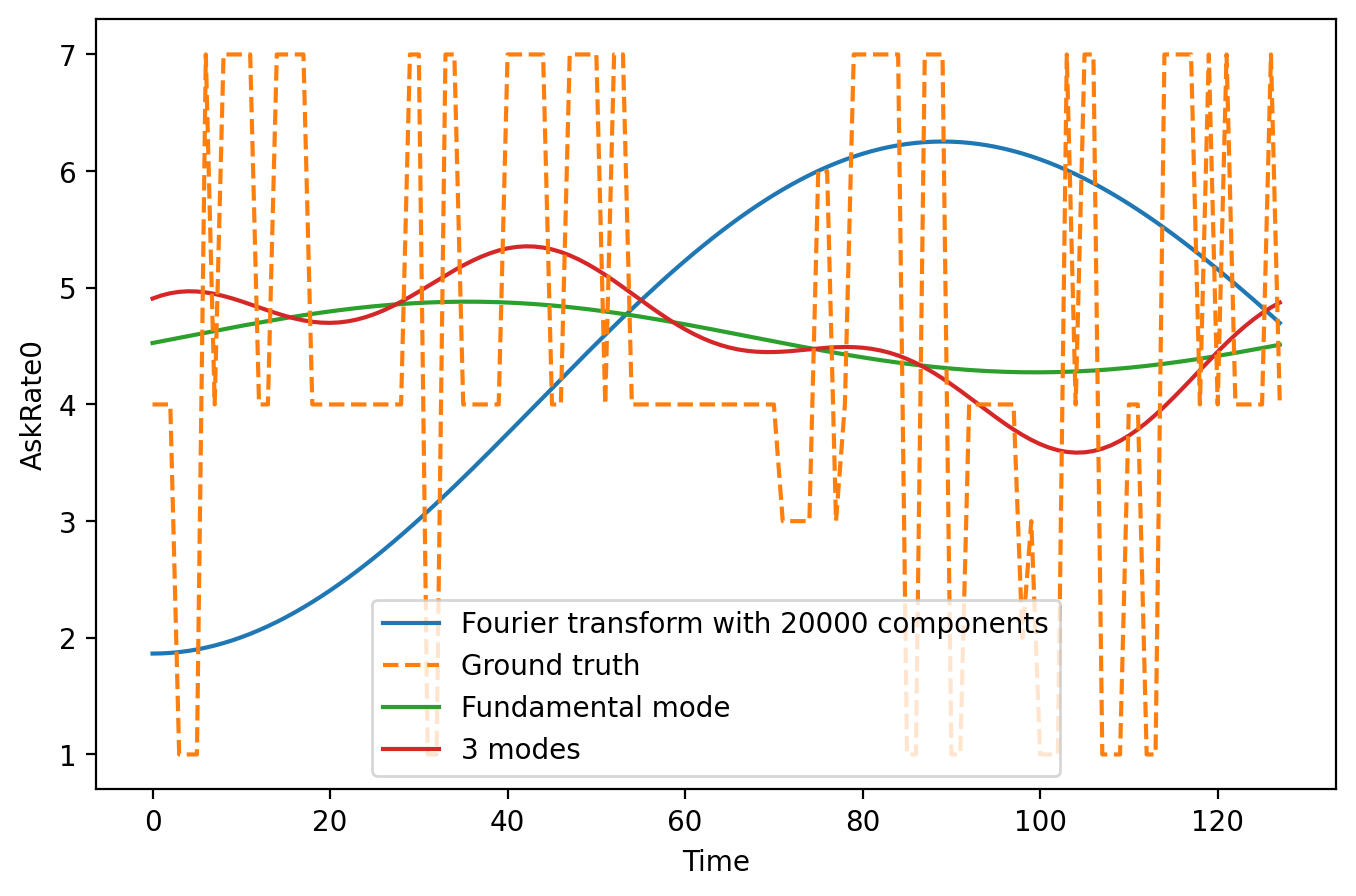

In [368]:

plt.figure(figsize=(8, 5), dpi=100)
modes = 20000
lower = 359
upper = lower + 128

ffttouse = np.copy(fft)
ffttouse[modes:-modes]=0
plt.plot(np.real(np.fft.ifft(ffttouse))[lower:upper], label='Fourier transform with {} components'.format(modes))

plt.plot(df[column].values[lower:upper], ls="dashed", label='Ground truth', zorder=4)

# for num_ in [100]:
#     fft_list_m10_small= np.copy(close_fftsmall)
#     fft_list_m10_small[num_:-num_]=0
#     plt.plot(np.real(np.fft.ifft(fft_list_m10_small))[lower:upper], label='Small Fourier transform with {} components'.format(num_))

fftsmall = np.fft.fft(np.asarray(df[column].iloc[lower:upper].tolist()))
num2_ = 1
fftsmall[num2_:-num2_]=0
plt.plot(np.real(np.fft.ifft(fftsmall)), label='Fundamental mode')
fftsmall = np.fft.fft(np.asarray(df[column].iloc[lower:upper].tolist()))
# num2_ = 2
# fftsmall[num2_:-num2_]=0
# plt.plot(np.real(np.fft.ifft(fftsmall)), label='2 modes')
# fftsmall = np.fft.fft(np.asarray(df[column].iloc[lower:upper].tolist()))
num2_ = 3
fftsmall[num2_:-num2_]=0
plt.plot(np.real(np.fft.ifft(fftsmall)), label='3 modes')

# plt.plot(df[column].rolling(window=10, min_periods=1).mean().values[lower:upper], label='SMA', ls="dotted")
# plt.semilogx()
plt.xlabel('Time')
plt.ylabel('AskRate0')
plt.legend()
plt.show()

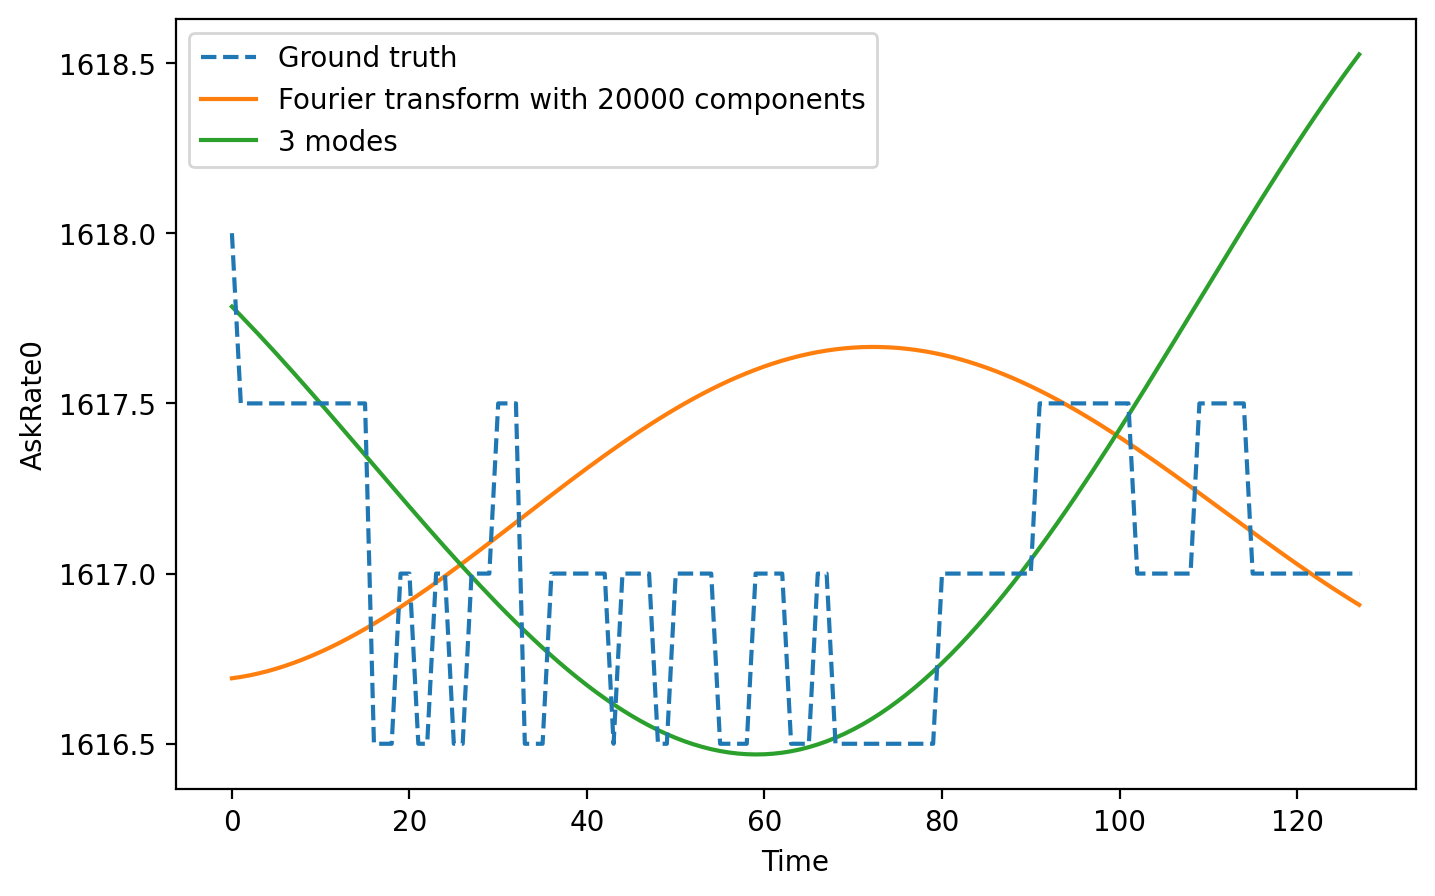

In [364]:

plt.figure(figsize=(8, 5), dpi=100)
modes = 20000
lower = 359
upper = lower + 128

plt.plot(df[column].values[lower:upper], ls="dashed", label='Ground truth', zorder=4)

ffttouse = np.copy(fft)
ffttouse[modes:-modes]=0
plt.plot(np.real(np.fft.ifft(ffttouse))[lower:upper], label='Fourier transform with {} components'.format(modes))

####################

# fftsmall = np.fft.fft(np.asarray(df[column].iloc[lower:upper].tolist()))
# num2_ = 1
# fftsmall[num2_:-num2_]=0
# plt.plot(np.real(np.fft.ifft(fftsmall)), label='Fundamental mode')

####################

fftsmall = np.fft.fft(np.asarray(df[column].iloc[:upper].tolist()))
num2_ = 4
fftsmall[num2_:-num2_]=0
plt.plot(np.real(np.fft.ifft(fftsmall))[lower:upper], label='3 modes')

# plt.plot(df[column].rolling(window=10, min_periods=1).mean().values[lower:upper], label='SMA', ls="dotted")
# plt.semilogx()
plt.xlabel('Time')
plt.ylabel('AskRate0')
plt.legend()
plt.show()

(32, 60)
(32, 10)


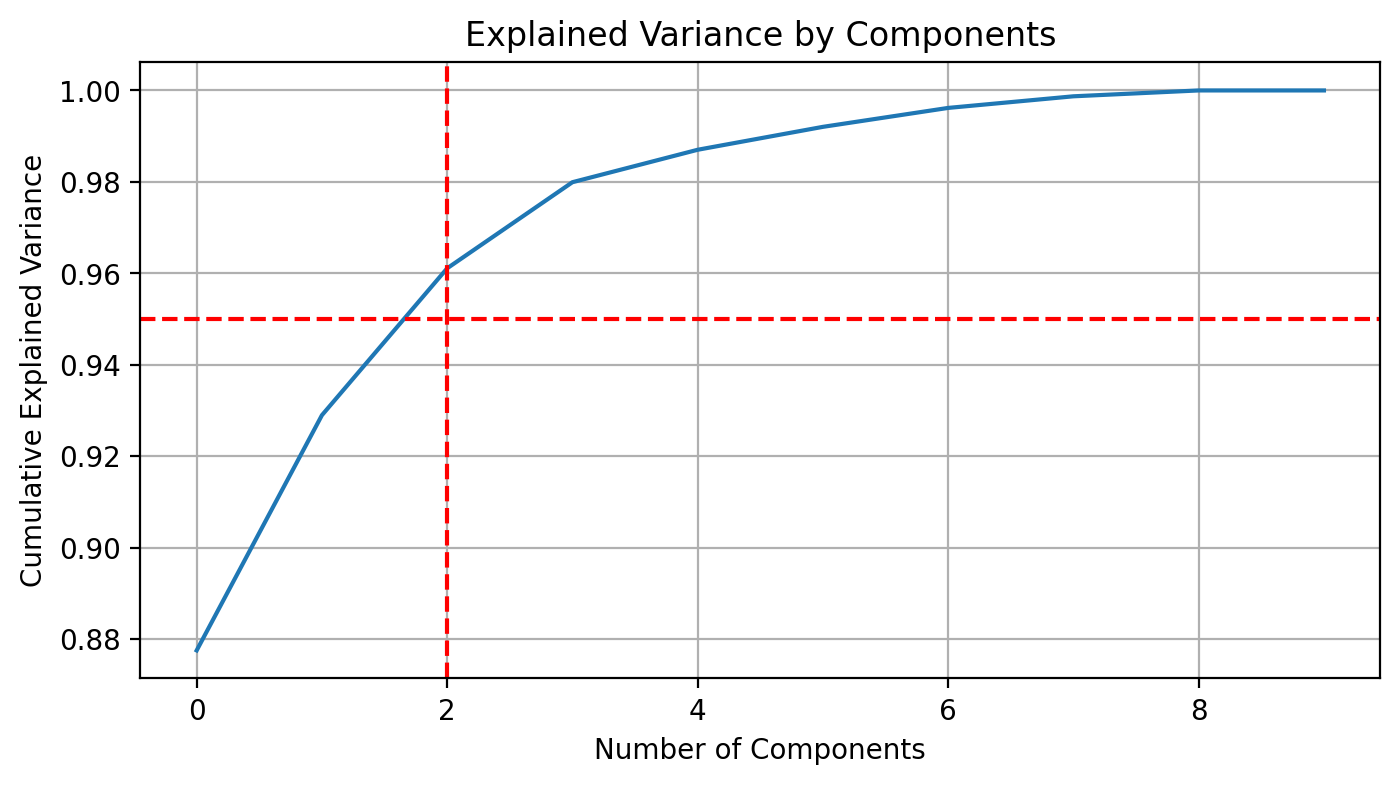

Number of components that explain at least 95% of variance: 3


In [232]:
from sklearn.decomposition import PCA

lower = 123547
upper = lower + 32
mydata = df.iloc[lower:upper, :-1].values
print(mydata.shape)

n_components = 10
pca = PCA(n_components=n_components)
data_transformed = pca.fit_transform(mydata)
print(data_transformed.shape)

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)

# Draw a line at 95% of explained variance
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95), color='r', linestyle='--')

plt.show()

# Number of components at 95% variance
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print("Number of components that explain at least 95% of variance:", n_components_95)

In [229]:
data_transformed

array([[-5.58066055e+00, -9.30055293e-01,  6.14415451e-02,
        -4.99363799e-02,  7.63338103e-01, -2.04436206e-01,
        -8.71833641e-01, -7.57450912e-02, -2.07094275e-01,
         1.09591735e-15],
       [-5.48864022e+00, -1.48746008e+00,  2.90292434e-01,
        -7.32186569e-01,  5.50351856e-02, -4.61161974e-01,
        -2.18080542e-01, -1.36142231e-02,  1.98047194e-01,
        -4.79614690e-16],
       [-5.42750083e+00, -8.45673369e-01, -1.07637348e-01,
        -1.20064675e+00,  1.57350772e-01, -7.34956275e-01,
         8.05166560e-02,  1.71187456e-02,  2.18877890e-02,
         1.34510331e-16],
       [-5.49875456e+00, -3.51947766e-01, -3.50398262e-01,
        -8.10970743e-01,  5.03337082e-01, -2.60761895e-01,
        -1.49750636e-01, -1.72926681e-01,  3.48492373e-01,
         9.58059861e-17],
       [-5.41200045e+00, -1.24745953e-01, -3.27400473e-01,
        -3.36285059e-01, -1.78295625e-01,  2.43877833e-01,
         4.46871711e-01, -5.69586720e-01, -3.46069253e-01,
        -3.

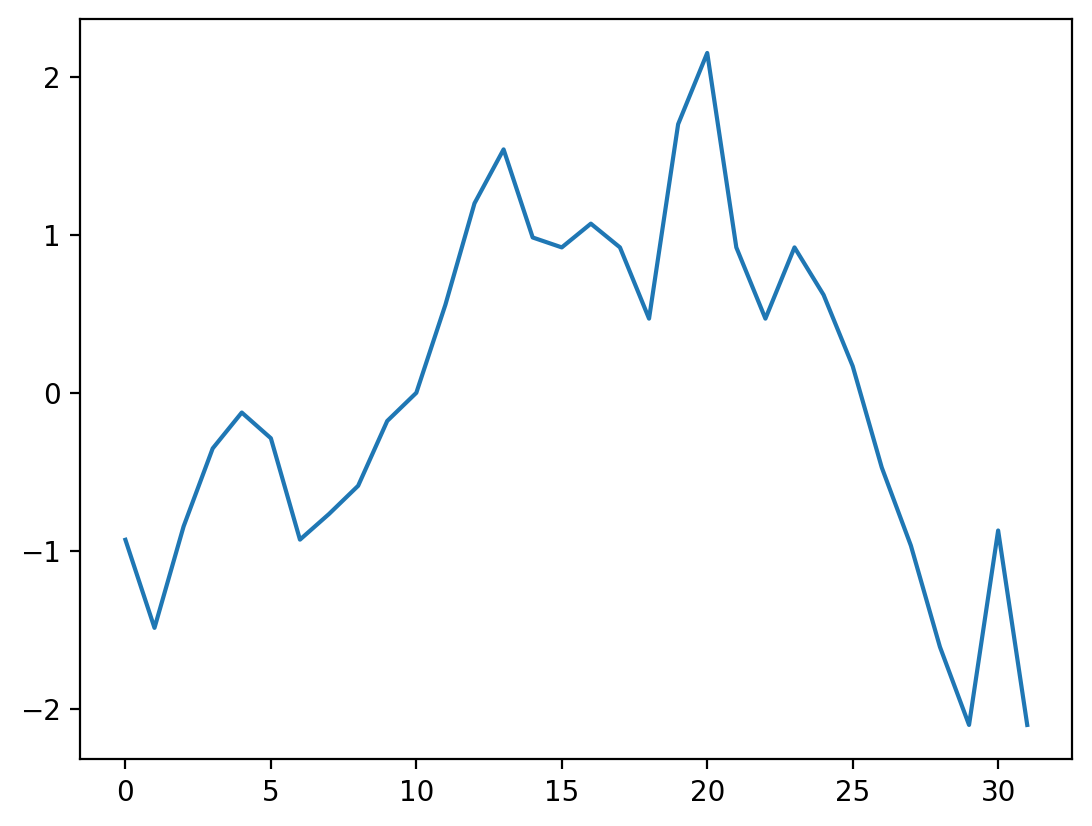

In [231]:
plt.plot(data_transformed[:,1])

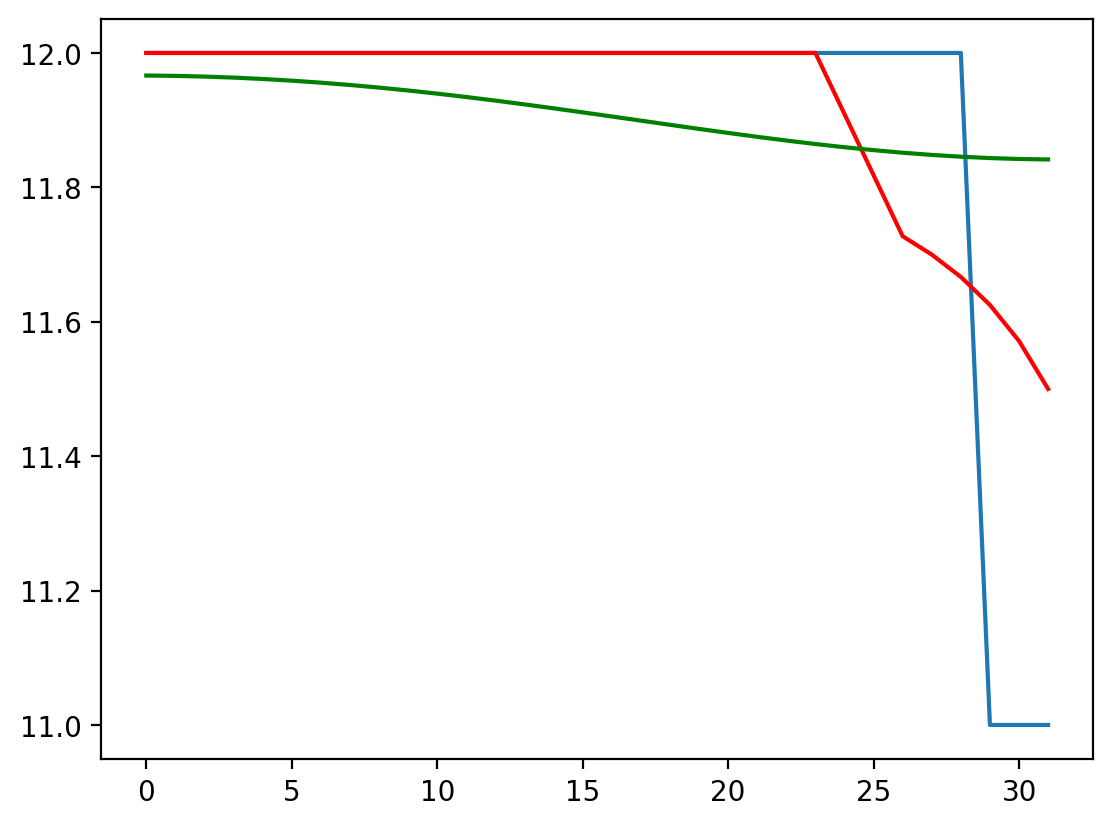

In [288]:
from scipy.ndimage import gaussian_filter1d
lower = 12359
upper = lower + 32

data = df.iloc[lower:upper,:-1].values

# Define the window size
window_size = 10
half_window = window_size // 2

# Initialize an array to hold the moving averages
moving_averages = np.zeros_like(data)

# Compute the moving average for each column
for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        # Define window limits, adjusting at edges
        start = max(0, j - half_window)
        end = min(data.shape[0], j + half_window + 1)
        
        # Compute the average within the window
        moving_averages[j, i] = np.mean(data[start:end, i])


sigma = 15
smoothed_data = np.zeros_like(data)
# Apply the Gaussian filter to each column
for i in range(data.shape[1]):
    smoothed_data[:, i] = gaussian_filter1d(data[:, i], sigma=sigma)


plt.plot(data[:,20])
plt.plot(moving_averages[:,20], color="red")
plt.plot(smoothed_data[:,20], color="green")

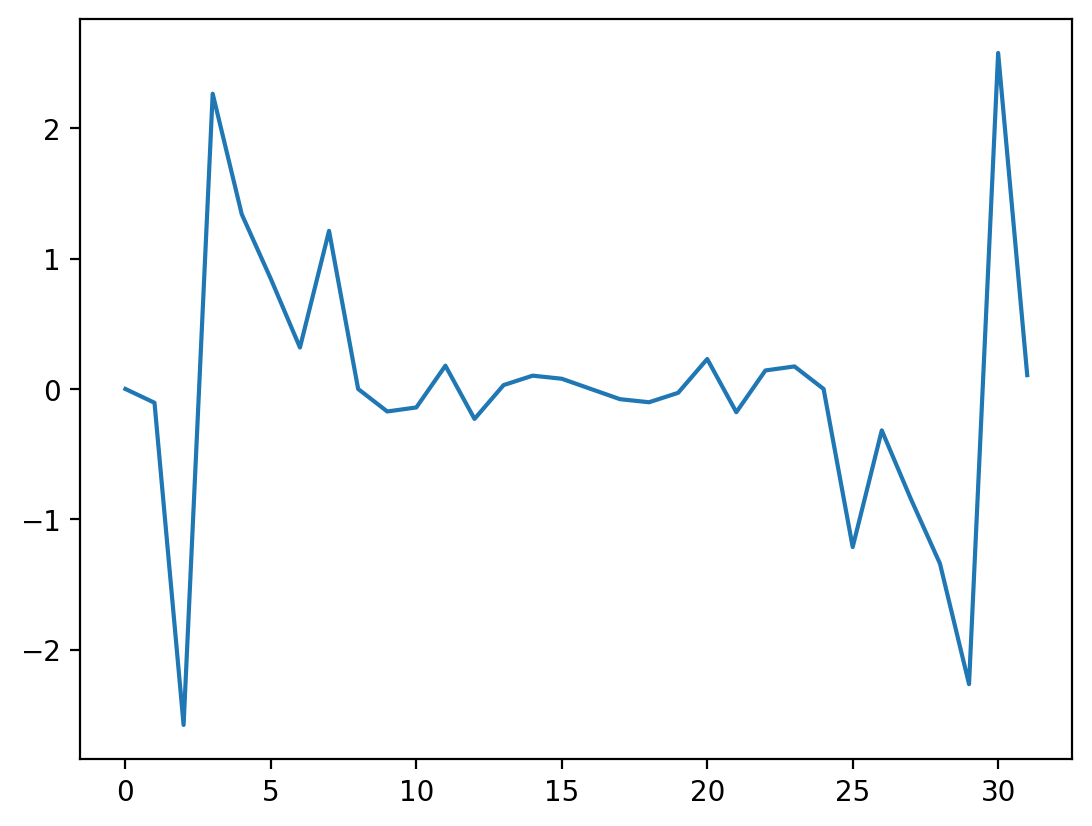

In [350]:
column = "askRate0"
lower = 1242
upper = lower + 32
fftsmall = np.imag(np.fft.fft(np.asarray(df[column].iloc[lower:upper].tolist())))
fftsmall = (fftsmall - np.mean(fftsmall)) / np.std(fftsmall)

plt.plot(fftsmall)